In [1]:
# Nature style
import matplotlib.pyplot as plt

fontsize = 7
capsize = 1.5
plt.rcParams.update({
    # Figure size and DPI
    'figure.dpi': 300, # High DPI for initial saving
    'savefig.dpi': 300, # High DPI for output file
    'savefig.bbox': 'tight', # Removes excess white space around figure
    'savefig.transparent': True, # Make the background transparent
    
    # Font settings
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica'], # Use Helvetica or Arial
    'pdf.fonttype': 42,
    # size: 5-7 
    'font.size': fontsize, # Base size. Axes labels will be this size.
    'axes.titlesize': fontsize, # Size of the axes title
    'axes.labelsize': fontsize, # Size of the x and y labels
    'xtick.labelsize': fontsize, # Size of the x-tick labels
    'ytick.labelsize': fontsize, # Size of the y-tick labels
    'legend.fontsize': fontsize, # Size of the legend text
    
    # Line settings
    'lines.linewidth': .5,
    'lines.markersize': 2,
    
    # Axes settings
    'axes.linewidth': 0.5, # Width of the axes border
    'xtick.major.width': 0.5, # Width of the x-tick lines
    'ytick.major.width': 0.5, # Width of the y-tick lines
    'xtick.major.size': 3, # Length of the x-ticks
    'ytick.major.size': 3, # Length of the y-ticks
    
    # Other settings
    'legend.frameon': False, # Remove the box around the legend
    'legend.handlelength': 1.5, # Length of the legend lines
})

# Define the WIDTH of your figure in inches (Single column: 89 mm, double column: 183 mm, max height: 170 mm)
width_in_inches = 85/25.4 # 85 mm
height_in_inches = 85/25.4 # 85 mm
figsize=(width_in_inches*2, height_in_inches/2)

In [2]:
base_font_size = fontsize
c0, c1, c2 = 'royalblue', 'forestgreen', 'red'

In [3]:
fn = './relatedness_bonsai.csv'

In [4]:
import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

In [5]:
df = pd.read_csv(fn)
df.head()

,method,delta_d,true_d,accuracy
0,DRUID,0,1,100
1,DRUID,0,2,95
2,DRUID,0,3,81
3,DRUID,0,4,71
4,DRUID,0,5,52


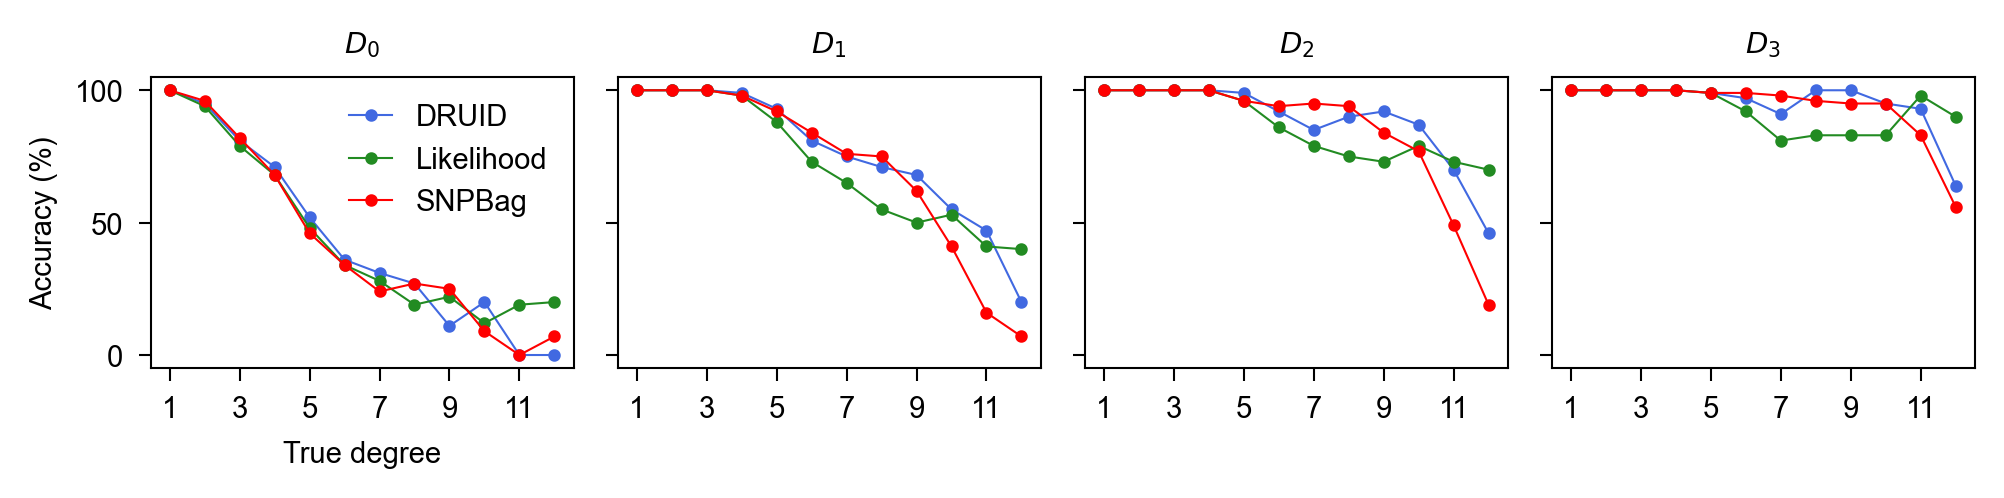

In [6]:
# make 4 subplots, each with different delta_d values
# in each subplot, plot the line plot of the 3 methods with true_d as x-axis and the accuracy as y-axis, plot legend in the top right corner
# import matplotlib.pyplot as plt

# Get unique delta_d values and sort them
delta_d_values = sorted(df['delta_d'].unique())

# Get unique methods
methods = df['method'].unique()

# Specify colors for the methods
color_map = {
    methods[0]: c0,
    methods[1]: c1,
    methods[2]: c2
}

fig, axes = plt.subplots(1, 4, figsize=figsize, sharey=True)

# Flatten axes array for easy indexing
axes = axes.flatten()

for i, delta_d in enumerate(delta_d_values):
    ax = axes[i]
    sub_df = df[df['delta_d'] == delta_d]
    for method in methods:
        method_df = sub_df[sub_df['method'] == method]
        ax.plot(
            method_df['true_d'],
            method_df['accuracy'],
            marker='o',
            label=method,
            color=color_map.get(method, None)
        )
    ax.set_title(r'$D_{%d}$' % delta_d)
    # Set x-ticks to every 2nd integer value present in true_d for this subplot
    x_ticks = sorted(sub_df['true_d'].unique())
    # Only keep every 2nd tick (e.g., 1, 3, 5, ...)
    x_ticks_every_2 = [x for idx, x in enumerate(x_ticks) if idx % 2 == 0]
    ax.set_xticks(x_ticks_every_2)
    ax.set_xticklabels([str(int(x)) for x in x_ticks_every_2])
    if i == 0:
        ax.set_xlabel('True degree')
        ax.set_ylabel('Accuracy (%)')
        ax.legend()

# Hide any unused subplots if there are less than 4 delta_d values
for j in range(len(delta_d_values), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('relatedness_bonsai.pdf')
plt.show()
